In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [134]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [135]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [136]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775063 entries, 0 to 1775062
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 27.1 MB


In [137]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1775058    0.12
1775059    0.13
1775060    0.12
1775061    0.12
1775062    0.12
Name: kWh, Length: 1775063, dtype: float64

In [138]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1775058    0.12
1775059    0.13
1775060    0.12
1775061    0.12
1775062    0.12
Name: kWh, Length: 1775063, dtype: float64

In [139]:
l=len(conso_data)-1
l

1775062

In [140]:
conso_data['sec']=conso_data['Interval']/1000


In [141]:
conso_data['Wh']=3600000/conso_data['Interval']


In [142]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [143]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775063 entries, 0 to 1775062
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 67.7 MB


In [144]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1775058,28857,0.12,28.857,124.753093,43689056978
1775059,27479,0.13,27.479,131.009134,43689084457
1775060,29000,0.12,29.000,124.137931,43689113457
1775061,29269,0.12,29.269,122.997028,43689142726
1775062,29401,0.12,29.401,122.444815,43689172127


In [145]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

43689172127000

In [146]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 22, 54, 201554)

In [147]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [148]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [149]:
base

datetime.datetime(2023, 8, 21, 20, 22, 54, 201554)

In [150]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:23:16.135554
1         2023-08-21 20:23:37.993554
2         2023-08-21 20:23:59.994554
3         2023-08-21 20:24:21.922554
4         2023-08-21 20:24:43.813554
                     ...            
1775058   2025-01-08 12:13:51.179554
1775059   2025-01-08 12:14:18.658554
1775060   2025-01-08 12:14:47.658554
1775061   2025-01-08 12:15:16.927554
1775062   2025-01-08 12:15:46.328554
Name: dates, Length: 1775063, dtype: datetime64[ns]

## créer les dates

In [151]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:23:16.135554,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:23:37.993554,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:23:59.994554,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:24:21.922554,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:24:43.813554,21/08/23
...,...,...,...,...,...,...,...
1775058,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25
1775059,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25
1775060,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25
1775061,29269,0.12,29.269,122.997028,43689142726,2025-01-08 12:15:16.927554,08/01/25


### save conso_data with dates

In [152]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [153]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('08/01/25', 8, 1, 2025)

In [154]:
here = now.strftime('%H:%M:%S')
here

'12:16:18'

In [155]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [156]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 1773640 to 1775062
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1423 non-null   int64         
 1   kWh        1423 non-null   float64       
 2   sec        1423 non-null   float64       
 3   Wh         1423 non-null   float64       
 4   cumul(ms)  1423 non-null   int64         
 5   dates      1423 non-null   datetime64[ns]
 6   days       1423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 88.9+ KB


In [157]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [158]:
data = list(df_grp['kWh'])
print(data)

[0.671, 3.7, 4.222, 3.688, 4.016, 4.626, 3.651, 3.444, 3.506, 3.699, 3.574, 3.986, 4.259, 3.636, 3.63, 3.639, 3.321, 3.374, 4.128, 4.027, 4.025, 4.054, 3.484, 4.332, 3.868, 3.753, 4.171, 4.701, 3.992, 3.214, 3.175, 3.893, 3.781, 3.106, 3.785, 4.162, 3.658, 3.682, 4.659, 4.282, 4.458, 3.829, 3.447, 4.29, 3.881, 3.831, 3.477, 4.034, 3.698, 3.415, 4.154, 3.377, 3.852, 3.862, 3.626, 3.747, 4.284, 3.273, 3.875, 3.088, 2.055, 2.042, 2.367, 4.076, 3.674, 4.351, 3.588, 3.964, 3.757, 3.785, 4.129, 4.054, 3.712, 3.128, 3.766, 3.569, 3.565, 3.713, 3.675, 3.318, 3.832, 3.253, 3.754, 3.604, 4.071, 3.613, 3.436, 3.716, 4.111, 4.336, 3.934, 4.147, 4.278, 3.784, 3.925, 3.817, 3.865, 3.752, 4.049, 4.395, 3.888, 3.508, 3.674, 3.677, 3.346, 3.843, 3.962, 4.136, 3.516, 4.157, 3.596, 3.945, 4.649, 3.622, 3.525, 3.543, 4.045, 3.832, 4.089, 3.97, 3.737, 3.606, 5.099, 3.742, 3.758, 4.227, 4.157, 4.518, 4.428, 4.137, 3.618, 4.432, 4.754, 4.12, 4.773, 4.403, 3.688, 4.092, 3.838, 3.694, 3.48, 3.963, 3.683, 3.705

In [159]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [160]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [161]:
df = conso_data
len(df)

1775063

In [162]:
period(p=2)

2023-08-22 02:29:29.938554	2023-08-22 09:33:45.558554	7h 4m 15s 	2000


In [163]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.297216
dtype: float64

In [164]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.50111
dtype: float64

In [165]:
last=df_grp.iloc[-1]['kWh']
last

1.423

In [166]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 1773640 to 1775062
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1423 non-null   int64         
 1   kWh        1423 non-null   float64       
 2   sec        1423 non-null   float64       
 3   Wh         1423 non-null   float64       
 4   cumul(ms)  1423 non-null   int64         
 5   dates      1423 non-null   datetime64[ns]
 6   days       1423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 88.9+ KB


In [167]:
# select day
day = today
#day = '16/08/24'


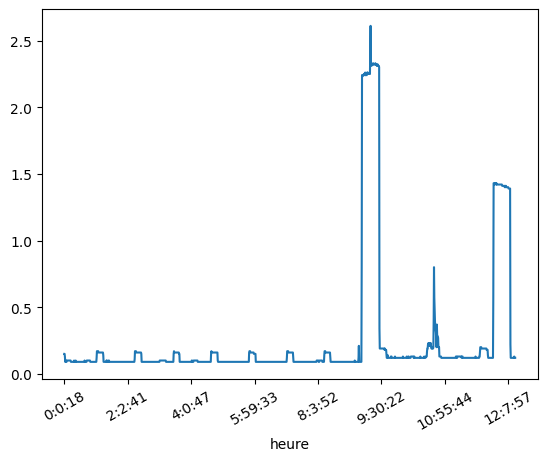

In [168]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [169]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:23:16.135554,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:23:37.993554,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:23:59.994554,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:24:21.922554,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:24:43.813554,21/08/23
...,...,...,...,...,...,...,...
1775058,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25
1775059,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25
1775060,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25
1775061,29269,0.12,29.269,122.997028,43689142726,2025-01-08 12:15:16.927554,08/01/25


In [170]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:18,23390,0.15,23.390,153.911928,43645044203,2025-01-08 00:00:18.404554,08/01/25
0:0:41,23484,0.15,23.484,153.295861,43645067687,2025-01-08 00:00:41.888554,08/01/25
0:1:9,27668,0.13,27.668,130.114211,43645095355,2025-01-08 00:01:09.556554,08/01/25
0:1:49,39999,0.09,39.999,90.002250,43645135354,2025-01-08 00:01:49.555554,08/01/25
0:2:25,36367,0.10,36.367,98.990843,43645171721,2025-01-08 00:02:25.922554,08/01/25
...,...,...,...,...,...,...,...
12:13:51,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25
12:14:18,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25
12:14:47,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25


In [171]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.068
Min : 21/12/24 3.013


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1773640,23390,0.15,23.390,153.911928,43645044203,2025-01-08 00:00:18.404554,08/01/25,0:0:18
1773641,23484,0.15,23.484,153.295861,43645067687,2025-01-08 00:00:41.888554,08/01/25,0:0:41
1773642,27668,0.13,27.668,130.114211,43645095355,2025-01-08 00:01:09.556554,08/01/25,0:1:9
1773643,39999,0.09,39.999,90.002250,43645135354,2025-01-08 00:01:49.555554,08/01/25,0:1:49
1773644,36367,0.10,36.367,98.990843,43645171721,2025-01-08 00:02:25.922554,08/01/25,0:2:25
...,...,...,...,...,...,...,...,...
1775058,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25,12:13:51
1775059,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25,12:14:18
1775060,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25,12:14:47
1775061,29269,0.12,29.269,122.997028,43689142726,2025-01-08 12:15:16.927554,08/01/25,12:15:16


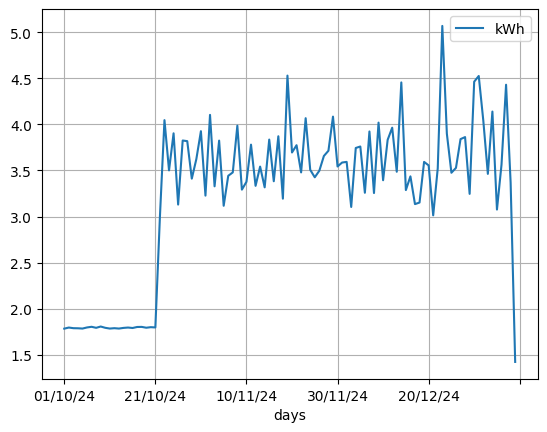

In [172]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-08 00:00:18.404554	2025-01-08 09:30:03.407554	9h 29m 45s 	1000
2025-01-08 09:30:03.407554	2025-01-08 12:15:46.328554	2h 45m 42s 	423
<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 1773640 to 1775062
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1423 non-null   int64         
 1   kWh        1423 non-null   float64       
 2   sec        1423 non-null   float64       
 3   Wh         1423 non-null   float64       
 4   cumul(ms)  1423 non-null   int64         
 5   dates      1423 non-null   datetime64[ns]
 6   days       1423 non-null   object        
 7   heure      1423 non-null   object        
 8   hours      1423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 111.2+ KB


('08/01/25', <Axes: xlabel='hours'>)

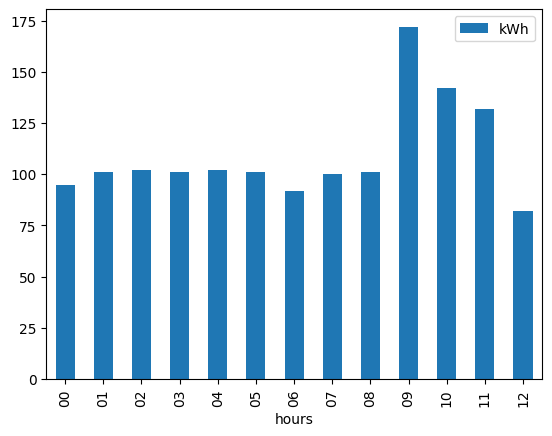

In [173]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [174]:
df_grp

,kWh
days,
21/08/23,0.671
22/08/23,3.700
23/08/23,4.222
24/08/23,3.688
25/08/23,4.016
...,...
04/01/25,3.076
05/01/25,3.563
06/01/25,4.430


In [175]:
# select number of days to display
span = 30
#df_grp.tail(span)


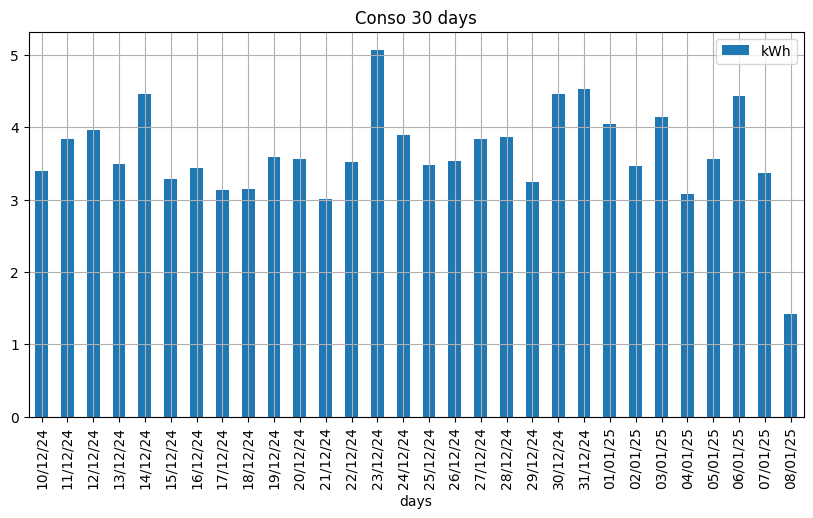

In [176]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


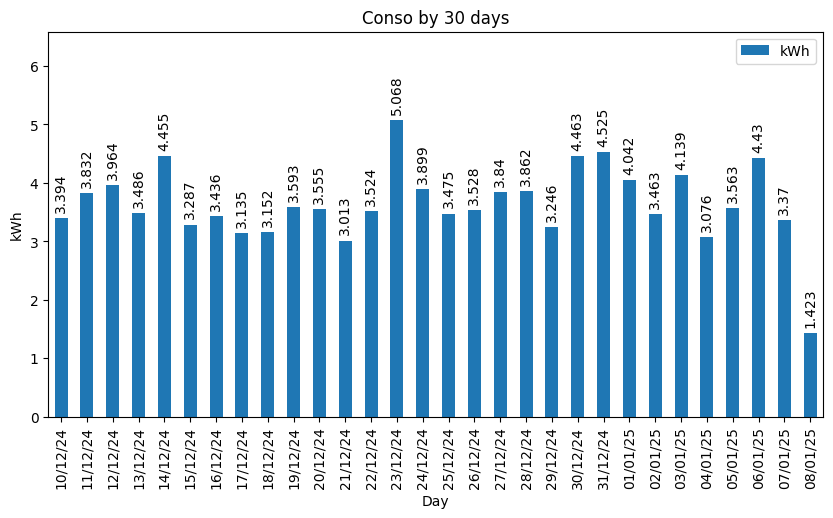

In [177]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [178]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
10/12/24    3.394
11/12/24    3.832
12/12/24    3.964
13/12/24    3.486
14/12/24    4.455
15/12/24    3.287
16/12/24    3.436
17/12/24    3.135
18/12/24    3.152
19/12/24    3.593
20/12/24    3.555
21/12/24    3.013
22/12/24    3.524
23/12/24    5.068
24/12/24    3.899
25/12/24    3.475
26/12/24    3.528
27/12/24    3.840
28/12/24    3.862
29/12/24    3.246
30/12/24    4.463
31/12/24    4.525
01/01/25    4.042
02/01/25    3.463
03/01/25    4.139
04/01/25    3.076
05/01/25    3.563
06/01/25    4.430
07/01/25    3.370
08/01/25    1.423
Name: kWh, dtype: float64

In [179]:
x_labels=df_grp.tail(span).index
x_labels

Index(['10/12/24', '11/12/24', '12/12/24', '13/12/24', '14/12/24', '15/12/24',
       '16/12/24', '17/12/24', '18/12/24', '19/12/24', '20/12/24', '21/12/24',
       '22/12/24', '23/12/24', '24/12/24', '25/12/24', '26/12/24', '27/12/24',
       '28/12/24', '29/12/24', '30/12/24', '31/12/24', '01/01/25', '02/01/25',
       '03/01/25', '04/01/25', '05/01/25', '06/01/25', '07/01/25', '08/01/25'],
      dtype='object', name='days')

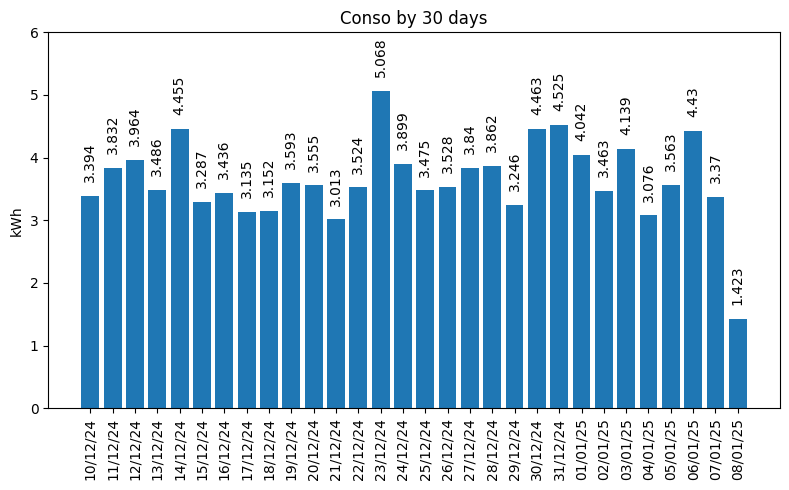

In [180]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [181]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

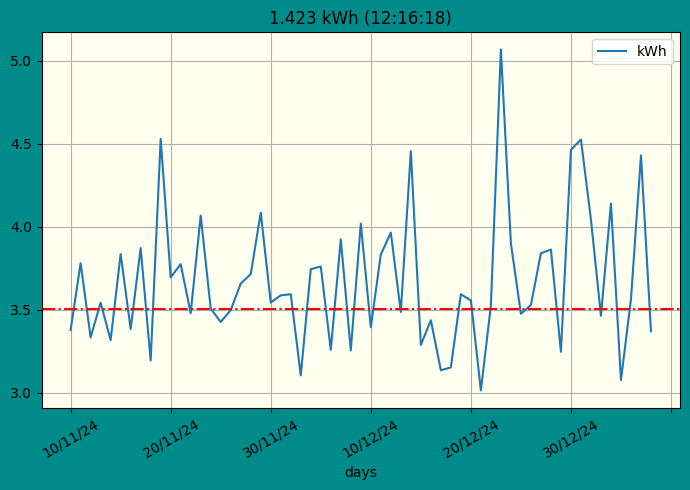

In [182]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

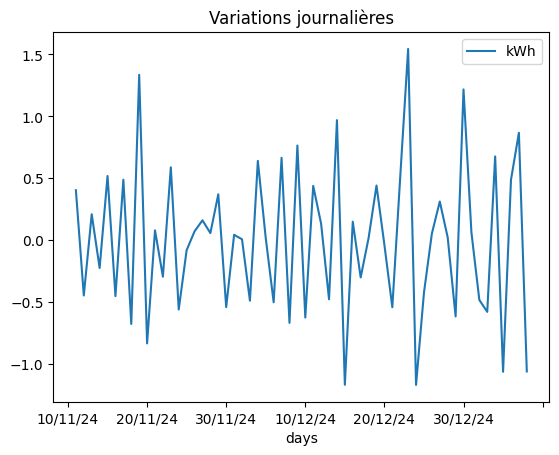

In [183]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [184]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:23:16.135554,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:23:37.993554,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:23:59.994554,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:24:21.922554,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:24:43.813554,21/08/23,20
...,...,...,...,...,...,...,...,...
1775058,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25,12
1775059,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25,12
1775060,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25,12
1775061,29269,0.12,29.269,122.997028,43689142726,2025-01-08 12:15:16.927554,08/01/25,12


In [185]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [186]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [187]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [188]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,671
22/08/23,3700
23/08/23,4222
24/08/23,3688
25/08/23,4016
...,...
04/01/25,3076
05/01/25,3563
06/01/25,4430


In [190]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:23:16.135554,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:23:37.993554,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:23:59.994554,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:24:21.922554,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:24:43.813554,21/08/23,20
...,...,...,...,...,...,...,...,...
1775058,28857,0.12,28.857,124.753093,43689056978,2025-01-08 12:13:51.179554,08/01/25,12
1775059,27479,0.13,27.479,131.009134,43689084457,2025-01-08 12:14:18.658554,08/01/25,12
1775060,29000,0.12,29.000,124.137931,43689113457,2025-01-08 12:14:47.658554,08/01/25,12
1775061,29269,0.12,29.269,122.997028,43689142726,2025-01-08 12:15:16.927554,08/01/25,12


In [191]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
08/01/25 12    1775058  08/01/25    12  0.12
               1775059  08/01/25    12  0.13
               1775060  08/01/25    12  0.12
               1775061  08/01/25    12  0.12
               1775062  08/01/25    12  0.12

[1775063 rows x 3 columns]

In [192]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [193]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [194]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,671,671
22/08/23,3700,3700
23/08/23,4222,4222
24/08/23,3688,3688
25/08/23,4016,4016
...,...,...
04/01/25,3076,3076
05/01/25,3563,3563
06/01/25,4430,4430


In [195]:
grp_by_day['kWh'].cumsum()

days
21/08/23        671
22/08/23       4371
23/08/23       8593
24/08/23      12281
25/08/23      16297
             ...   
04/01/25    1762277
05/01/25    1765840
06/01/25    1770270
07/01/25    1773640
08/01/25    1775063
Name: kWh, Length: 507, dtype: int64

In [196]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     116
         21     281
         22     144
         23     130
22/08/23 00     130
...             ...
08/01/25 08     101
         09     172
         10     142
         11     132
         12      82

[12137 rows x 1 columns]

In [197]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           116
          21           397
          22           541
          23           671
22/08/23  00           801
                    ...   
08/01/25  08       1774535
          09       1774707
          10       1774849
          11       1774981
          12       1775063
Name: kWh, Length: 12137, dtype: int64

In [198]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     116     116    NaN
         21     281     397  165.0
         22     144     541 -137.0
         23     130     671  -14.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
08/01/25 08     101     895    1.0
         09     172    1067   71.0
         10     142    1209  -30.0
         11     132    1341  -10.0
         12      82    1423  -50.0

[12137 rows x 3 columns]

In [199]:
today, grp_by_dayhours.loc[today]

('08/01/25',
        kWh  cumsum  diff
 hours                   
 00      95      95   NaN
 01     101     196   6.0
 02     102     298   1.0
 03     101     399  -1.0
 04     102     501   1.0
 05     101     602  -1.0
 06      92     694  -9.0
 07     100     794   8.0
 08     101     895   1.0
 09     172    1067  71.0
 10     142    1209 -30.0
 11     132    1341 -10.0
 12      82    1423 -50.0)

Text(0.5, 1.0, 'Cumul journalier')

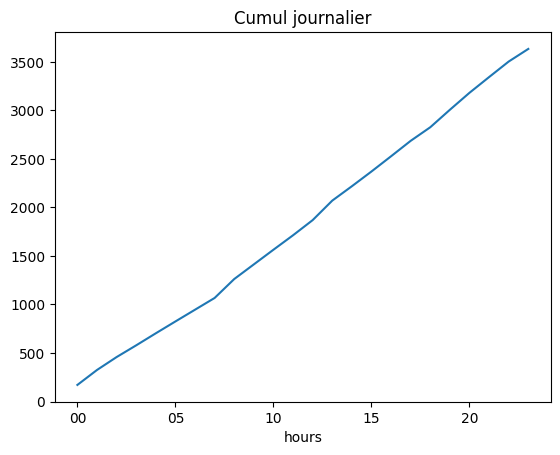

In [200]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

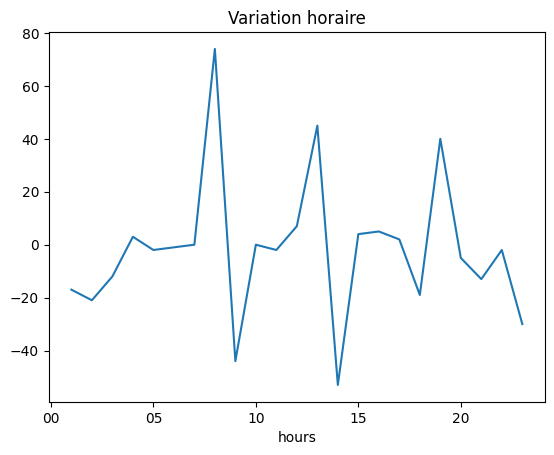

In [201]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [202]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

507

In [203]:
df_grp.tail(n)['kWh'].describe()


count    507.000000
mean       3.501110
std        0.690365
min        0.671000
25%        3.339500
50%        3.618000
75%        3.878000
max        5.099000
Name: kWh, dtype: float64

In [204]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '507 days')

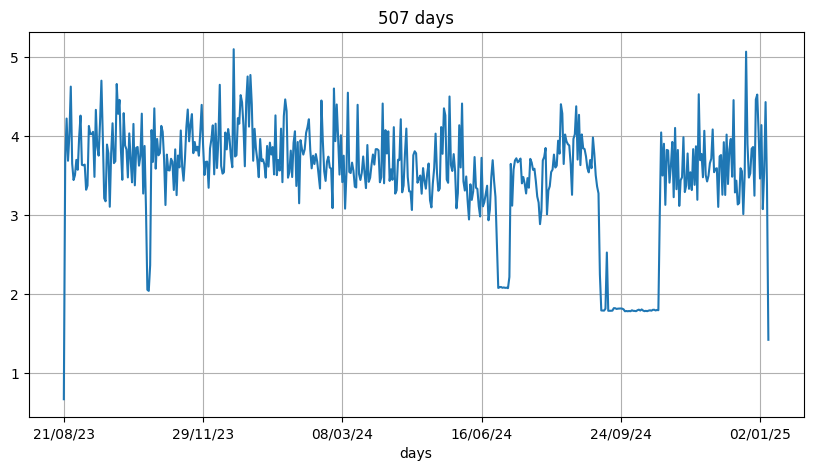

In [205]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

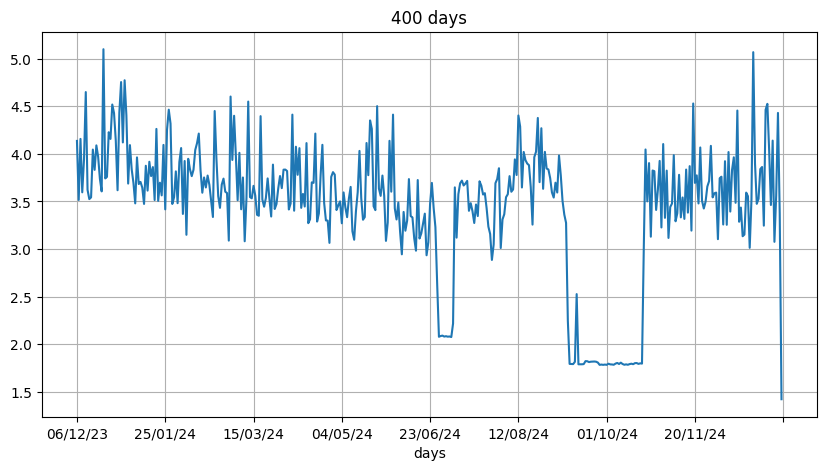

In [206]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [207]:
df_grp['kWh']

days
21/08/23    0.671
22/08/23    3.700
23/08/23    4.222
24/08/23    3.688
25/08/23    4.016
            ...  
04/01/25    3.076
05/01/25    3.563
06/01/25    4.430
07/01/25    3.370
08/01/25    1.423
Name: kWh, Length: 507, dtype: float64

In [208]:
df_grp.describe()

,kWh
count,507.000000
mean,3.501110
std,0.690365
min,0.671000
25%,3.339500
50%,3.618000
75%,3.878000
max,5.099000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

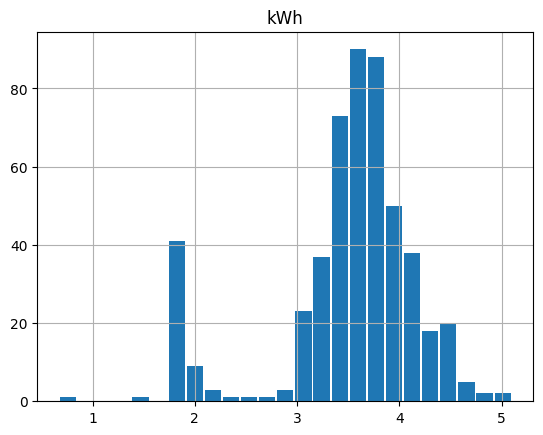

In [209]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [210]:
df_grp.tail(span)['kWh']

days
06/12/23    4.136
07/12/23    3.516
08/12/23    4.157
09/12/23    3.596
10/12/23    3.945
            ...  
04/01/25    3.076
05/01/25    3.563
06/01/25    4.430
07/01/25    3.370
08/01/25    1.423
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [211]:
day

'08/01/25'

In [212]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,95,95,NaN
01,101,196,6.0
02,102,298,1.0
03,101,399,-1.0
04,102,501,1.0
05,101,602,-1.0
06,92,694,-9.0
07,100,794,8.0
08,101,895,1.0


In [213]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


13

In [214]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 14)

In [215]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [216]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [217]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
Name: days, dtype: float64

In [218]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [219]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 00 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     13 non-null     int64  
 1   cumsum  13 non-null     int64  
 2   diff    12 non-null     float64
 3   days    13 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 520.0+ bytes


In [220]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
Name: days, dtype: float64

In [221]:
day

'08/01/25'

In [222]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,95,95,NaN,1.0
01,101,196,6.0,2.0
02,102,298,1.0,3.0
03,101,399,-1.0,4.0
04,102,501,1.0,5.0
05,101,602,-1.0,6.0
06,92,694,-9.0,7.0
07,100,794,8.0,8.0
08,101,895,1.0,9.0


Text(0.5, 1.0, '08/01/25')

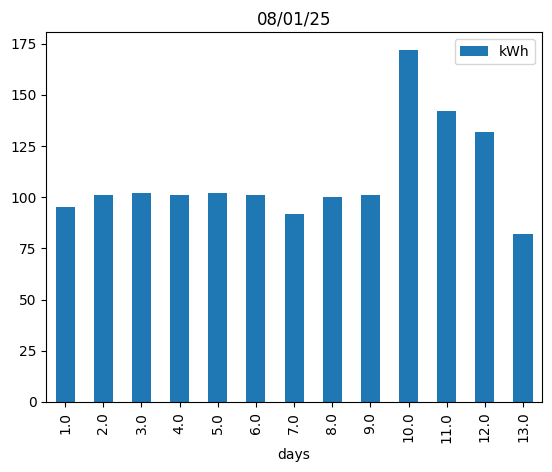

In [223]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [224]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'],
      dtype='object', name='hours')

# Conso du jour


In [225]:
groupedbyhour.count()

,kWh
hours,
00,95
01,101
02,102
03,101
04,102
05,101
06,92
07,100
08,101


In [226]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    165
01    166
02    152
03    170
04    150
05    163
06    145
07    115
08    131
09    123
10    121
11    131
12    114
13    131
14    202
15    140
16    155
17    965
18    210
19    282
20    302
21    309
22    314
23    243
Name: kWh, dtype: int64

In [227]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

323.734

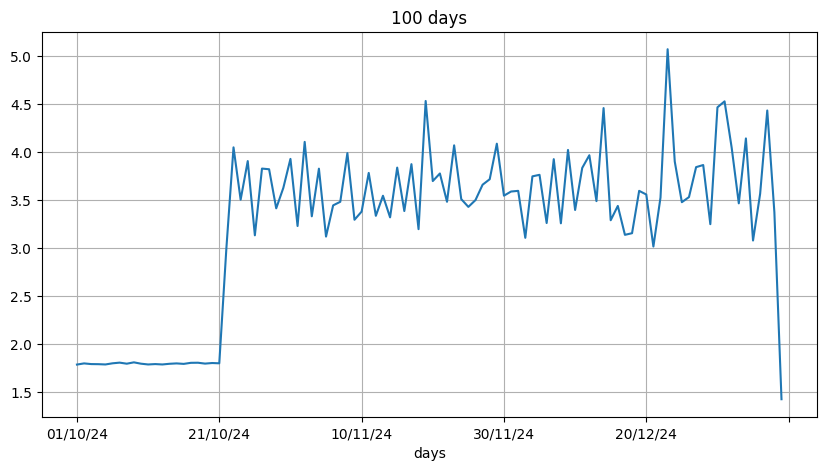

In [228]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [229]:
df_grp.tail(1)

,kWh
days,
08/01/25,1.423


In [230]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.423

In [231]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

90.93897032737732


# Today

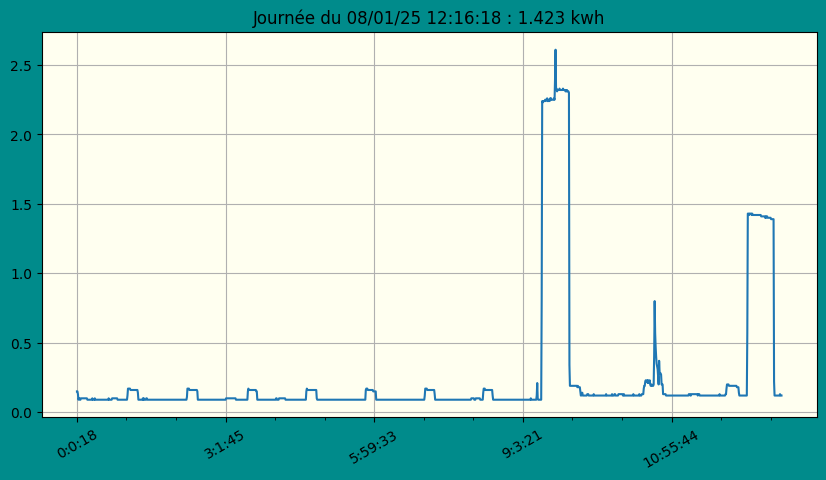

In [232]:
show(today,bgcolor='ivory')

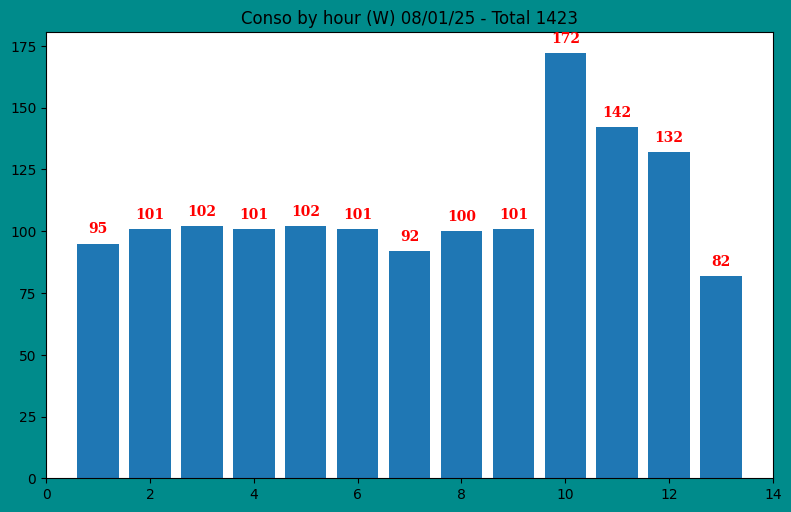

In [233]:
conso_by_hour(today)

In [234]:
day = '03/01/25'

('03/01/25', None)

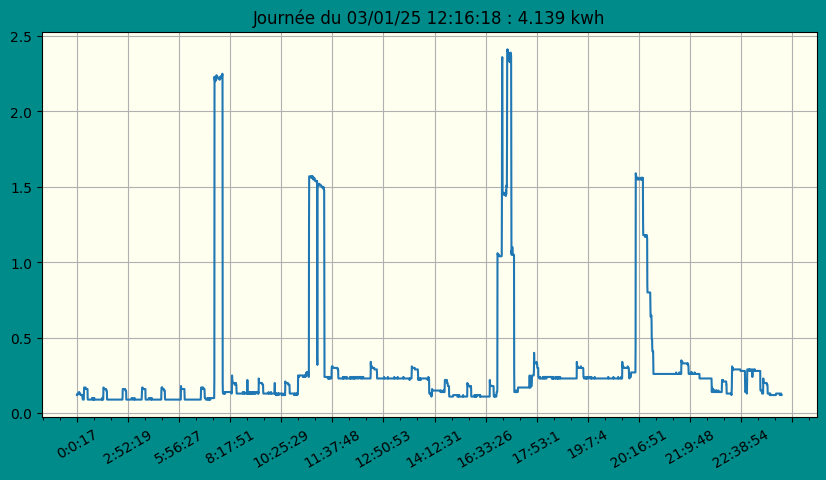

In [235]:
day, show(day,bgcolor='ivory')

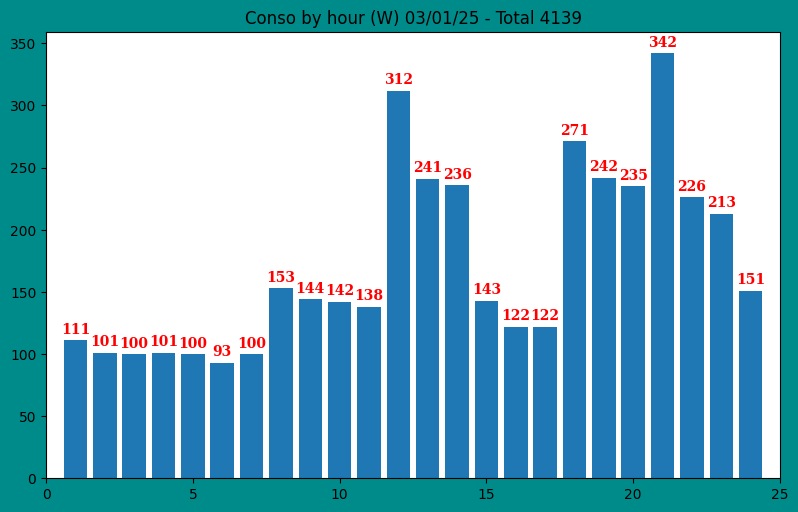

In [236]:
conso_by_hour(day)

In [237]:
maxday

'21/12/23'

('21/12/23', None)

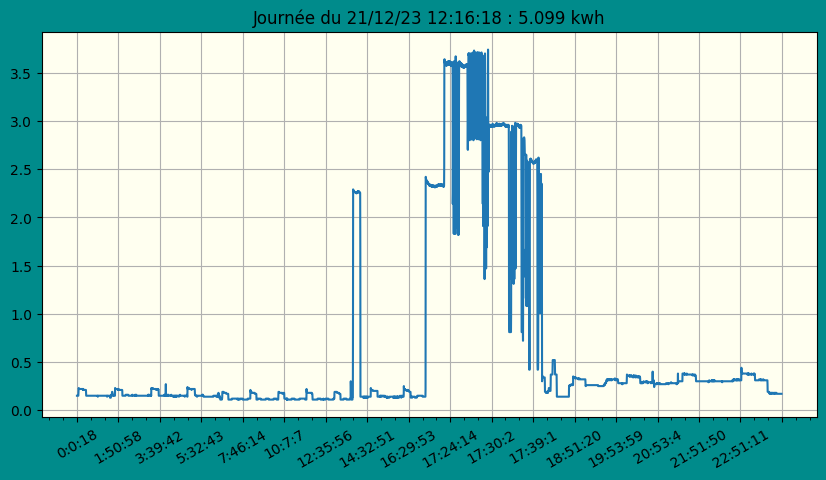

In [238]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

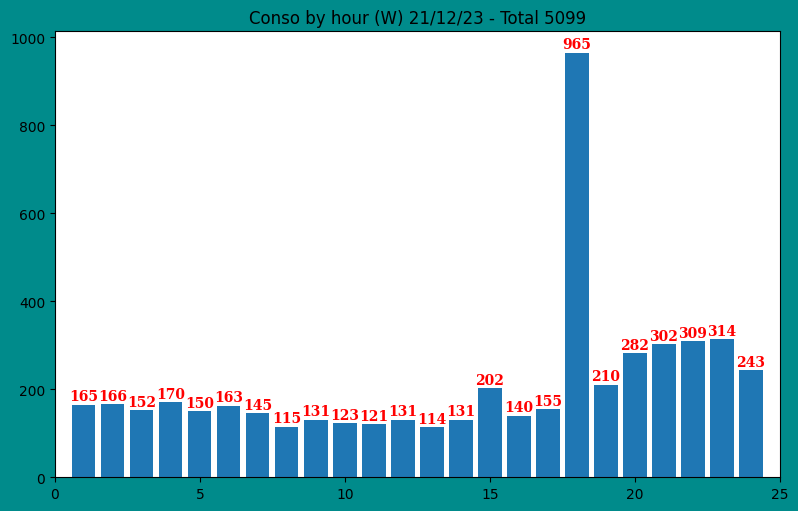

In [239]:
conso_by_hour(day)

In [240]:
sum(data)

5099

In [241]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,95,95,NaN,1.0
01,101,196,6.0,2.0
02,102,298,1.0,3.0
03,101,399,-1.0,4.0
04,102,501,1.0,5.0
05,101,602,-1.0,6.0
06,92,694,-9.0,7.0
07,100,794,8.0,8.0
08,101,895,1.0,9.0


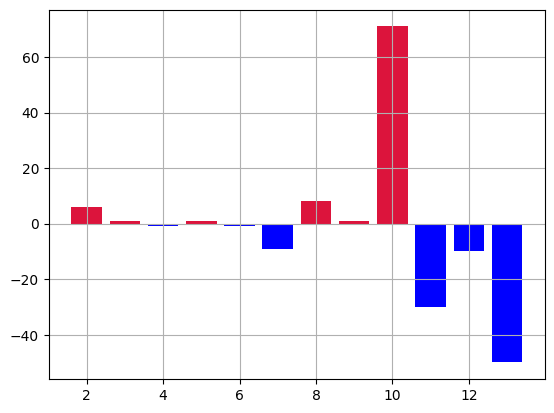

In [242]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [243]:
data

hours
00    165
01    166
02    152
03    170
04    150
05    163
06    145
07    115
08    131
09    123
10    121
11    131
12    114
13    131
14    202
15    140
16    155
17    965
18    210
19    282
20    302
21    309
22    314
23    243
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

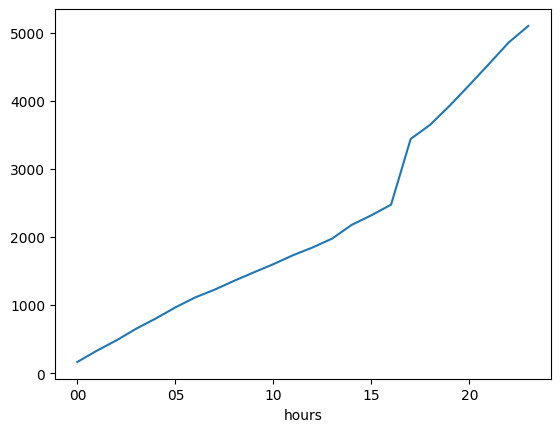

In [244]:
data.cumsum().plot()


<Axes: xlabel='hours'>

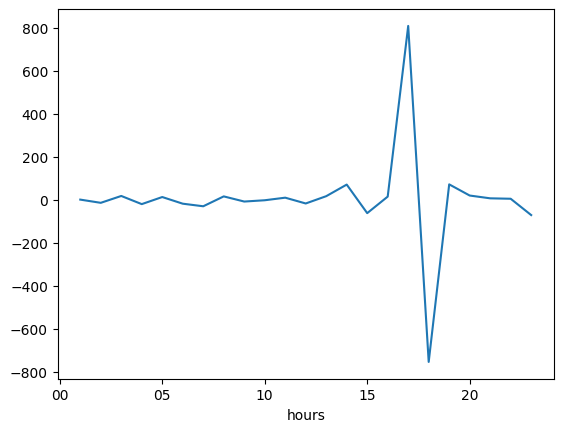

In [245]:
# evolution par heure
data.diff().plot()

In [246]:
data.diff().describe()

count     23.000000
mean       3.391304
std      238.268897
min     -755.000000
25%      -17.500000
50%        5.000000
75%       16.500000
max      810.000000
Name: kWh, dtype: float64

<Axes: >

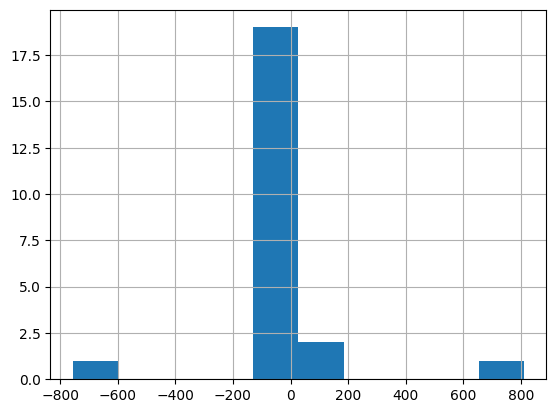

In [247]:
data.diff().hist()

# Test sauvegarde

In [248]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 

In [249]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [250]:
#conso_byhour(day)

In [251]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


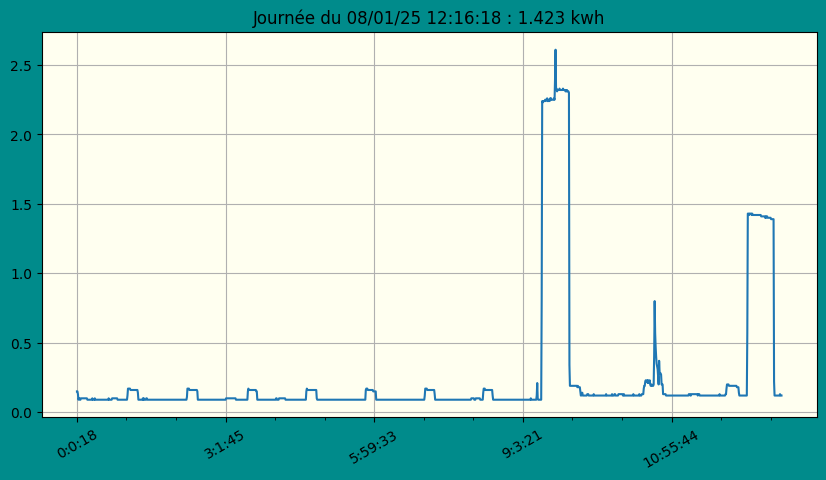

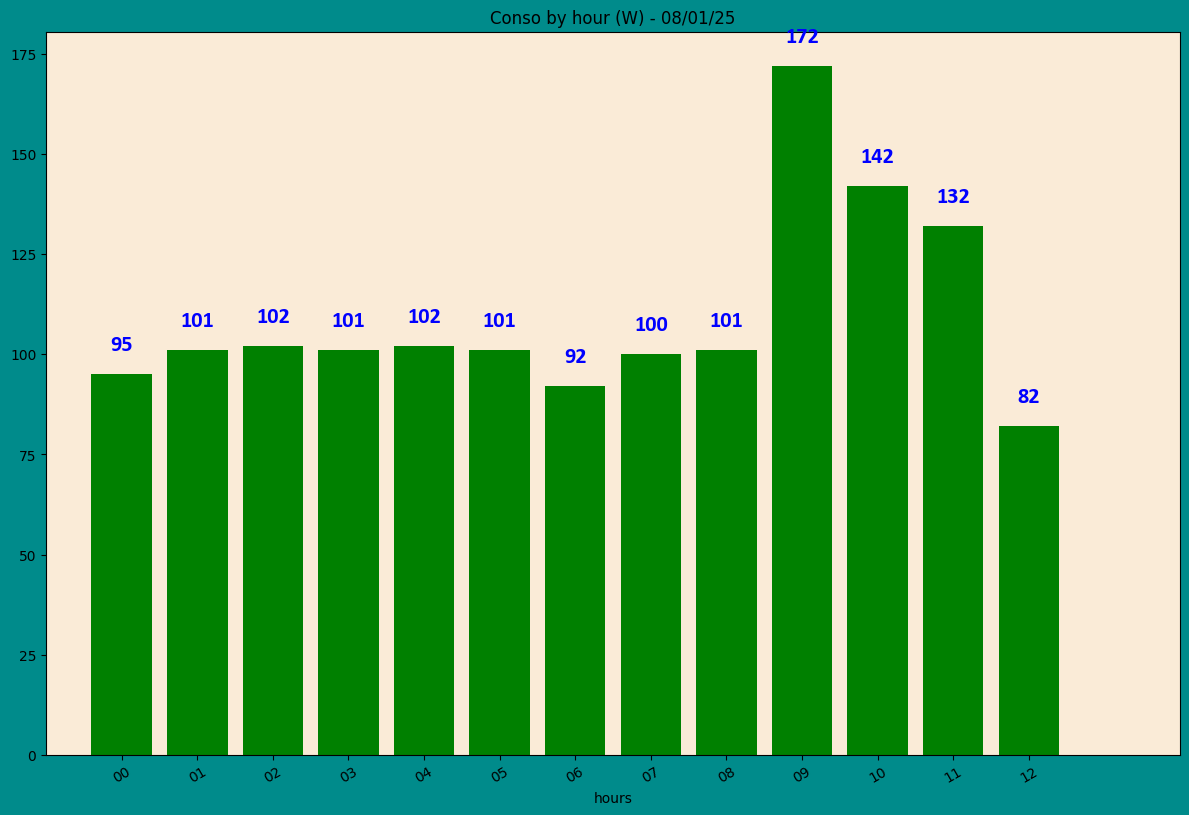

In [252]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [253]:
month.describe()


count    30.000000
mean      3.727800
std       0.498001
min       3.013000
25%       3.404500
50%       3.559000
75%       4.005250
max       5.068000
Name: kWh, dtype: float64

<Axes: >

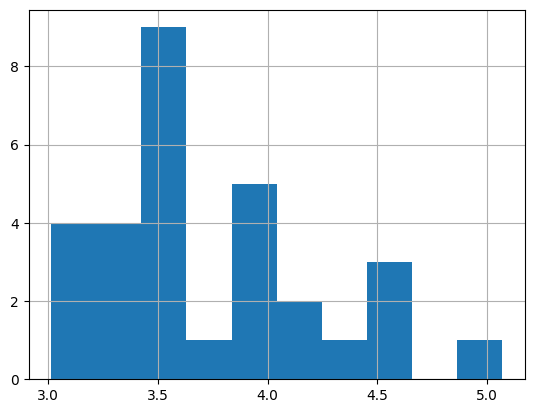

In [254]:
month.hist()

<Axes: xlabel='days'>

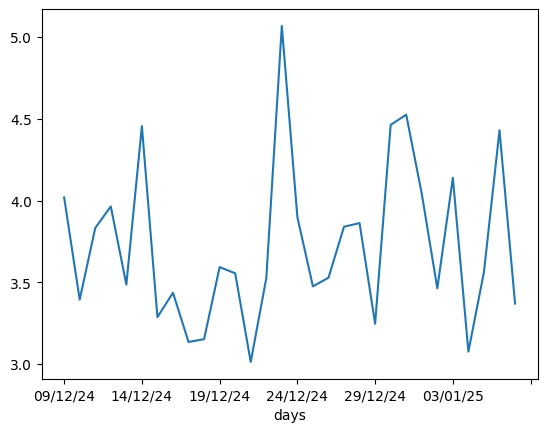

In [255]:
month.plot()

In [256]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [257]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

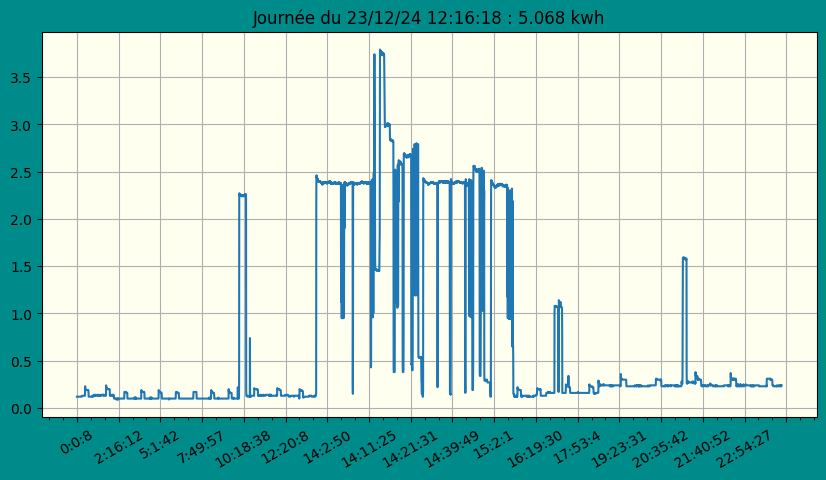

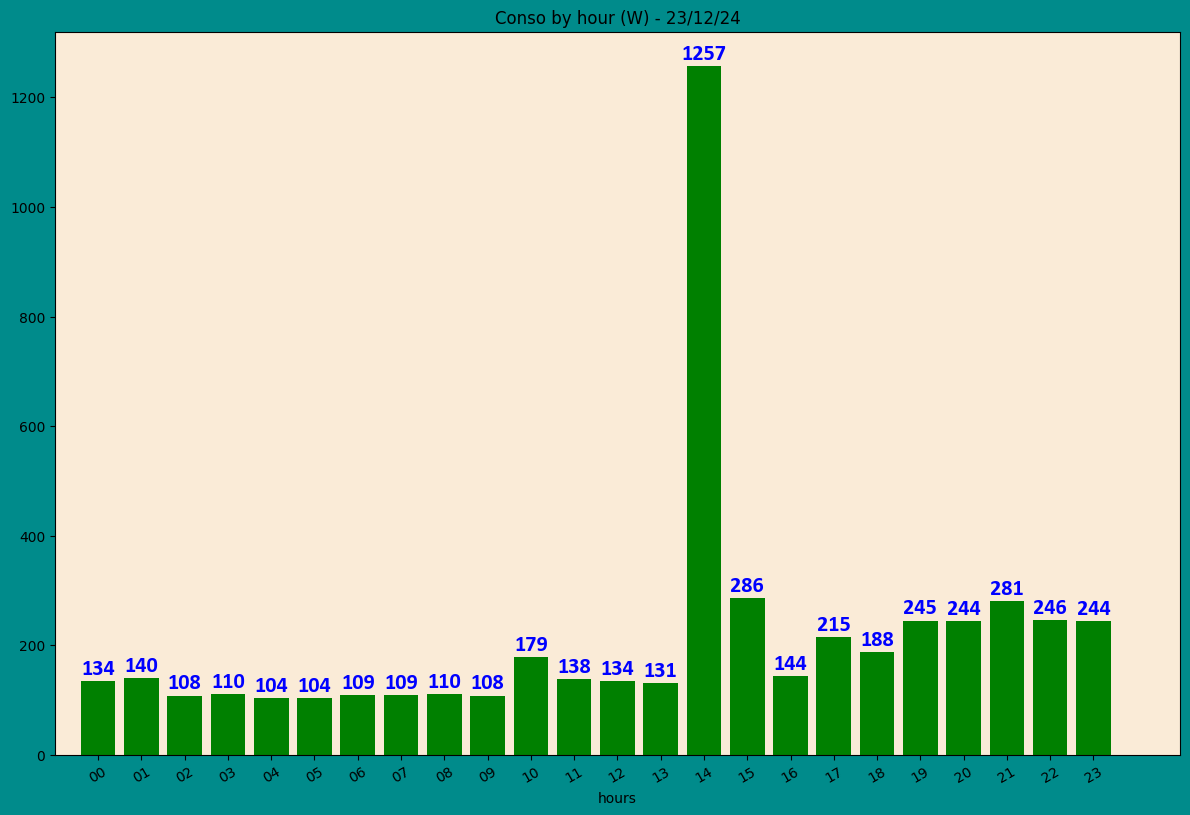

In [258]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [259]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     116     116    NaN   NaN
         21     281     397  165.0   NaN
         22     144     541 -137.0   NaN
         23     130     671  -14.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
08/01/25 08     101     895    1.0   9.0
         09     172    1067   71.0  10.0
         10     142    1209  -30.0  11.0
         11     132    1341  -10.0  12.0
         12      82    1423  -50.0  13.0

[12137 rows x 4 columns]

In [260]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,134,134,NaN,NaN
01,140,274,6.0,NaN
02,108,382,-32.0,NaN
03,110,492,2.0,NaN
04,104,596,-6.0,NaN
05,104,700,0.0,NaN
06,109,809,5.0,NaN
07,109,918,0.0,NaN
08,110,1028,1.0,NaN


In [261]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

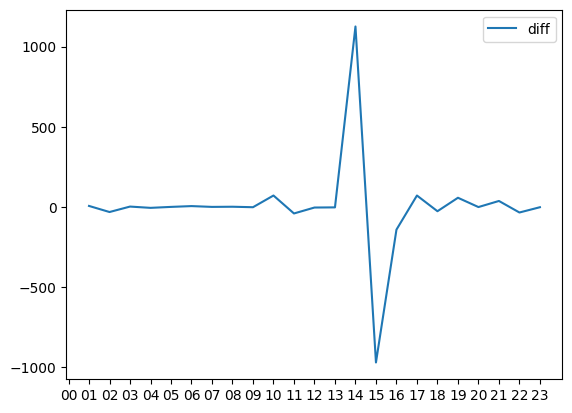

In [262]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

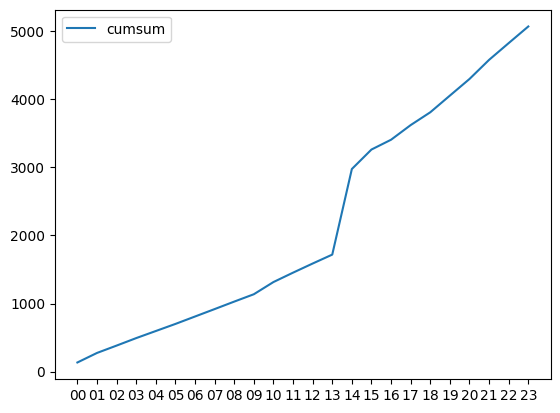

In [263]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [264]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB